# Representation

- Test to see whether PCLR/RHCNet representations and the extra tabular features itself has interently well-clustered structure on representation metric space
- Try out: 
    - PCLR
    - RHCNet

In [12]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Get Representation file

In [13]:
# NOTE: these have the same dimensionality/key mapping as df_tab (representation from )
pclr_reprs = np.load('pclr.npy') #pt_no, 320dim

In [14]:
def plot_tsne(X, y, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)

    plt.xticks(())
    plt.yticks(())
    plt.legend

    plt.show()

In [15]:
def plot_tsne_sns(X, y, colormap=plt.cm.Paired, num_colors=2, plot_title="pcwp15"):
    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    df = pd.DataFrame()
    df["y"] = y
    df["comp-1"] = X_embedded[:, 0]
    df["comp-2"] = X_embedded[:, 1]

    sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], hue=y,
                palette=sns.color_palette("hls", num_colors),
                data=df).set(title=plot_title)

In [16]:
pclr_reprs.shape

(6290, 320)

Get Label information from table_csv

In [17]:
tab = '/storage/shared/apollo/same-day/tabular_data.csv'
df_tab = pd.read_csv(tab)
df_tab = df_tab.dropna(subset=['CO'])
labels = df_tab['PCWP_mean'] > 15

/opt/miniconda/envs/pclr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/miniconda/envs/pclr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/miniconda/envs/pclr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


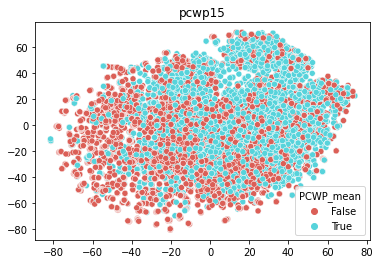

In [20]:
plot_tsne_sns(pclr_reprs, labels, num_colors=2, plot_title="pcwp15")

/opt/miniconda/envs/pclr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/miniconda/envs/pclr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/miniconda/envs/pclr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


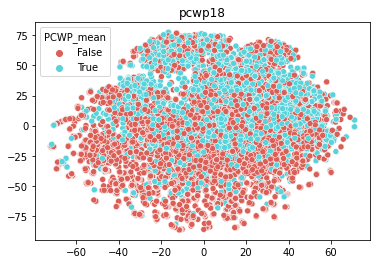

In [18]:
labels18 = df_tab['PCWP_mean'] > 18
plot_tsne_sns(pclr_reprs, labels18, num_colors=2, plot_title="pcwp18")
# plot_tsne(pclr_reprs, labels18)

/opt/miniconda/envs/pclr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/miniconda/envs/pclr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


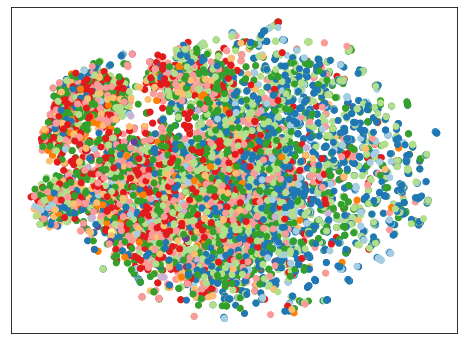

In [19]:
plot_tsne(pclr_reprs,df_tab['PCWP_mean'])

/opt/miniconda/envs/hyewonj/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


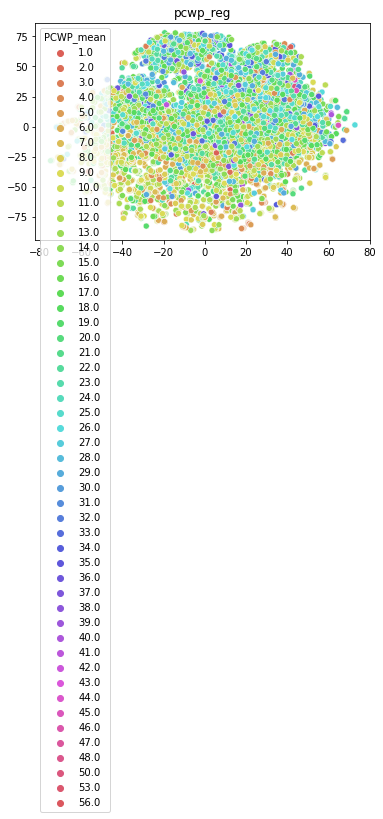

In [47]:
plot_tsne_sns(pclr_reprs, df_tab['PCWP_mean'], num_colors=51, plot_title="pcwp_reg")

In [46]:
len(np.unique(np.array(df_tab['PCWP_mean'])))

51

# Plot PCLR Representation w/ age bins

In [22]:
df_pclr_lookup = df_tab[['QuantaID', 'Date_of_Cath']]
df_pclr_lookup.insert(0, 'PCLR_index', list(range(len(df_pclr_lookup))))

In [23]:
# NOTE: these have the same dimensionality/key mapping as df_tab (representation from )
rhc_reprs = np.load('/storage/hyewonjeong/RHCnet/rhc.npy') #pt_no, 320dim

/opt/miniconda/envs/pclr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/miniconda/envs/pclr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/miniconda/envs/pclr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


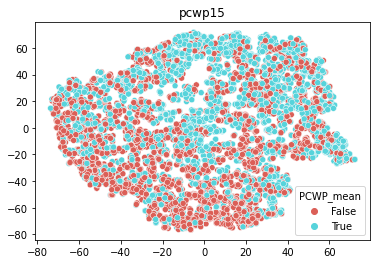

In [24]:
plot_tsne_sns(rhc_reprs, labels, num_colors=2, plot_title="pcwp15")

/opt/miniconda/envs/pclr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/miniconda/envs/pclr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/miniconda/envs/pclr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


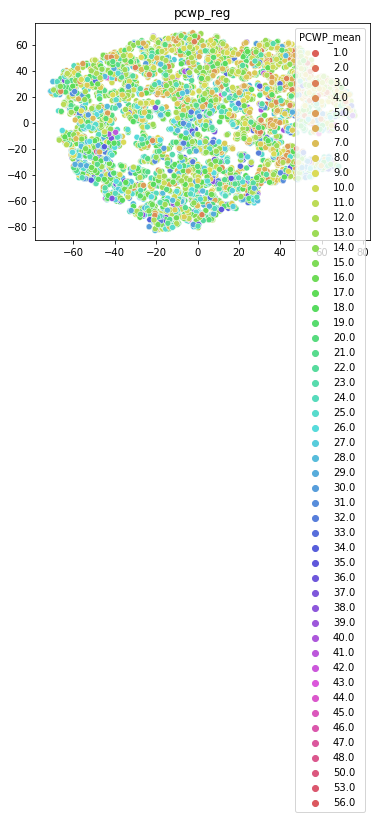

In [25]:
plot_tsne_sns(rhc_reprs, df_tab['PCWP_mean'], num_colors=51, plot_title="pcwp_reg")